# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [553]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [554]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [555]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [556]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [557]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [558]:
pd.DataFrame({'dataFeatures' : tsa.columns, 'dataType' : tsa.dtypes.values, 
              'null' : [tsa[i].isna().sum() for i in tsa.columns],
              'nullPct' : [((tsa[i].isna().sum()/len(tsa[i]))*100).round(2) for i in tsa.columns],
             'unique' : [tsa[i].nunique() for i in tsa.columns],
             'uniqueSample' : [list(pd.Series(tsa[i].unique()).sample(2)) for i in tsa.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2008041642582, 2005010572918]"
1,Date Received,object,70,0.14,3522,"[5-Sep-12, 21-Jul-06]"
2,Incident Date,object,570,1.12,10788,"[1/4/2011 9:41, 5/25/2012 19:00]"
3,Airport Code,object,2052,4.02,405,"[SJU, SCC]"
4,Airport Name,object,2052,4.02,419,"[Crescent City, Worcester Regional]"
5,Airline Name,object,8555,16.75,243,"[Lufthansa, British Airways]"
6,Claim Type,object,1960,3.84,8,"[-, Complaint]"
7,Claim Site,object,190,0.37,6,"[Checkpoint, Bus Station]"
8,Item,object,1012,1.98,1854,[Cell Phones; MP3 Players-(iPods; etc); Stereo...
9,Claim Amount,object,992,1.94,13248,"[$324.54 , $150.02 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [559]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [560]:
def rep(x):
    if x == '-':
        return np.nan
    else:
        return x
    
List = []

for i in tsa.columns:
    if '-' in tsa[i].unique():
        List.append(i)

for i in List:
    tsa[i] = tsa[i].apply(rep)

In [561]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [562]:
def time(x):
    try:
        pd.to_datetime(x)
        return 'No Error'
    except:
        return x
    
copy = tsa.copy()

copy['ErrorT'] = copy['Incident Date'].apply(time) 
ErrorT = tsa.drop(copy[copy['ErrorT'] == 'No Error'].index, axis = 0)

In [563]:
ErrorT['Date Received'] = ErrorT['Date Received'].apply(lambda x : pd.to_datetime(x))
ErrorT

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [564]:
tsa['Date Received'] = tsa['Date Received'].apply(lambda x : pd.to_datetime(x))

In [565]:
def YearI(x):
    try:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'])
        return x
    except:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'][:7] + str(x['Date Received'].year))
        return x
    
tsa[['Date Received', 'Incident Date']] = tsa[['Date Received', 'Incident Date']].apply(YearI, axis = 1)

In [566]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [567]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [568]:
tsa.iloc[ErrorT.index]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [569]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [570]:
tsa['Day Differences'] = (tsa['Date Received'] - tsa['Incident Date']).apply(lambda x : x.days)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

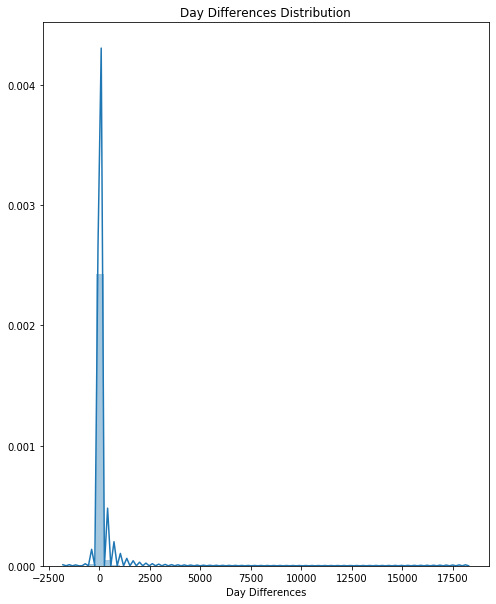

In [571]:
import seaborn as sns

plt.figure(figsize = (8,10))
g = sns.distplot(tsa.dropna()['Day Differences'])
g.set_title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

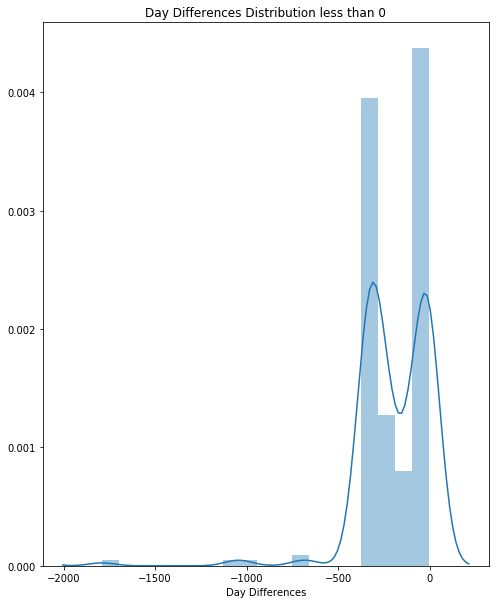

In [572]:
plt.figure(figsize = (8,10))
g = sns.distplot((tsa.dropna()[tsa.dropna()['Day Differences'] < 0])['Day Differences'])
g.set_title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

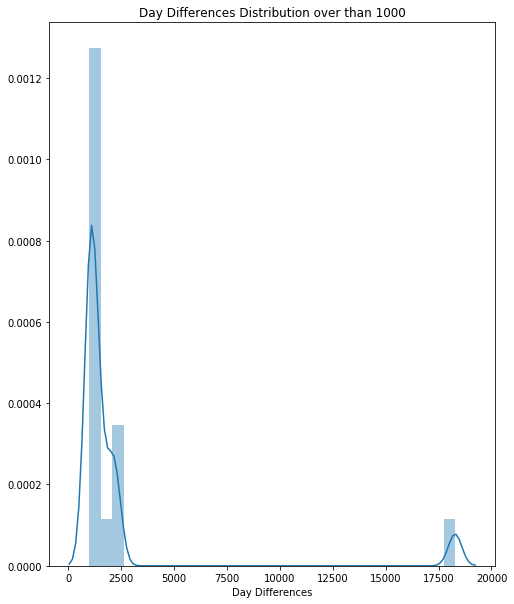

In [573]:
plt.figure(figsize = (8,10))
g = sns.distplot((tsa.dropna()[tsa.dropna()['Day Differences'] > 1000])['Day Differences'])
g.set_title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [574]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences'],
      dtype='object')

In [575]:
def diff(x):
    if x < 0:
        return 'Day differences are less than 0'
    else:
        return 'Day differences are over than 1000'

tsa['Day Differences'].apply(lambda x : diff(x)).value_counts()

Day differences are over than 1000    50618
Day differences are less than 0         448
Name: Day Differences, dtype: int64

In [576]:
tsa[tsa['Day Differences'] < 0]['Item'].value_counts().head(6)

Other                                         92
Luggage (all types including footlockers)     55
Clothing - Shoes; belts; accessories; etc.    42
Computer - Laptop                             29
Jewelry - Fine                                27
Locks                                         23
Name: Item, dtype: int64

In [577]:
tsa[tsa['Day Differences'] > 0]['Item'].value_counts().head()

Other                                         8906
Luggage (all types including footlockers)     4642
Clothing - Shoes; belts; accessories; etc.    3645
Jewelry - Fine                                2422
Locks                                         2345
Name: Item, dtype: int64

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [578]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences'],
      dtype='object')

In [579]:
def repd(x):
    if '$' in str(x):
        return x[1:]
    else:
        return x


tsa['Claim Amount'] = tsa['Claim Amount'].apply(repd).apply(lambda x : str(x).replace(';','')).apply(lambda x : float(x))
tsa['Close Amount'] = tsa['Close Amount'].apply(repd).apply(lambda x : str(x).replace(';','')).apply(lambda x : float(x))

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [580]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [581]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [582]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

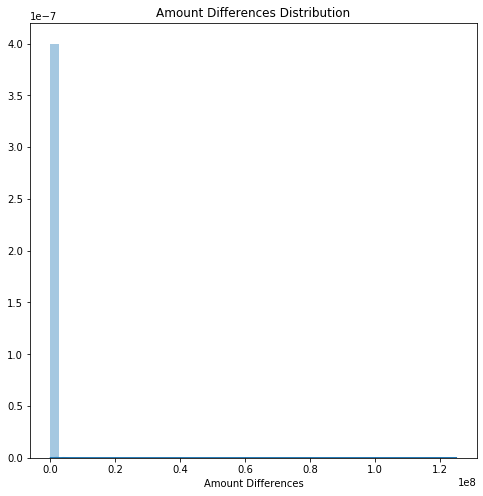

In [583]:
plt.figure(figsize = (8,8))
g = sns.distplot(tsa['Amount Differences'].dropna())
g.set_title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [584]:
tsa['Amount Differences'].dropna().describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [585]:
Q1_amount = tsa['Amount Differences'].describe()['25%']
Q3_amount = tsa['Amount Differences'].describe()['75%']
IQR = Q3_amount - Q1_amount

idx = tsa[(tsa['Amount Differences'] >= Q1_amount - (1.5*IQR)) & (tsa['Amount Differences'] <= Q3_amount + (1.5 * IQR))]['Amount Differences'].index
tsa_out = tsa.iloc[tsa.drop(idx)['Amount Differences'].dropna().index]
tsa_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [586]:
tsa_out['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [587]:
tsa_out['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [588]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [589]:
print('With Outlier')
pd.DataFrame({'nPeople' : [len(tsa[tsa['Amount Differences'] > 0]), len(tsa[tsa['Amount Differences'] < 0])
             ,len(tsa[tsa['Amount Differences'] == 0])],
             '%Approved': [(sum(tsa[tsa['Amount Differences'] > 0]['Status'] == 'Approved')/len(tsa[tsa['Amount Differences'] > 0]))*100,
                          (sum(tsa[tsa['Amount Differences'] < 0]['Status'] == 'Approved')/len(tsa[tsa['Amount Differences'] < 0]))*100,
                          (sum(tsa[tsa['Amount Differences'] == 0]['Status'] == 'Approved')/len(tsa[tsa['Amount Differences'] == 0]))*100]}, index = ['Bigger', 'Less', 'Equal'])

With Outlier


,nPeople,%Approved
Bigger,24684,0.514503
Less,111,90.990991
Equal,8675,96.887608


In [590]:
tsa_without = tsa.iloc[idx]

print('Without Outlier')

pd.DataFrame({'nPeople' : [len(tsa_without[tsa_without['Amount Differences'] > 0]), len(tsa_without[tsa_without['Amount Differences'] < 0])
             ,len(tsa_without[tsa_without['Amount Differences'] == 0])],
             '%Approved' : [(sum(tsa_without[tsa_without['Amount Differences'] > 0]['Status'] == 'Approved')/len(tsa_without[tsa_without['Amount Differences'] > 0]))*100,
                           (sum(tsa_without[tsa_without['Amount Differences'] < 0]['Status'] == 'Approved')/len(tsa_without[tsa_without['Amount Differences'] < 0]))*100,
                           (sum(tsa_without[tsa_without['Amount Differences'] == 0]['Status'] == 'Approved')/len(tsa_without[tsa_without['Amount Differences'] == 0]))*100]}, index = ['Bigger', 'Less', 'Equal'])

Without Outlier


,nPeople,%Approved
Bigger,20581,0.607356
Less,111,90.990991
Equal,8675,96.887608


In [591]:
sum(tsa[tsa['Amount Differences'] > 0]['Status'] == 'Approved')

127

Setuju, namun sangat sedikit yang disetujui (hanya 0.6%).

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

#### No. 1

In [592]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [593]:
tsa[['Airport Name', 'Airline Name', 'Claim Type']].head()

,Airport Name,Airline Name,Claim Type
0,Miami International Airport,American Airlines,Property Damage
1,Phoenix Sky Harbor International,NaN,Property Damage
2,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN
3,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss
4,Boston (Logan) International Airport,NaN,Property Damage


In [594]:
for i in ['Airport Name', 'Airline Name', 'Claim Type']:
    print(i)
    print(tsa[i].nunique())
    print('\n')

Airport Name
418


Airline Name
242


Claim Type
7




John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
Name: Airport Name, dtype: int64


Text(0, 0.5, 'Airport Name')

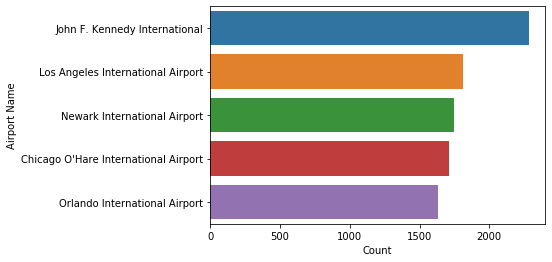

In [595]:
print(tsa['Airport Name'].value_counts().head())

airport = pd.DataFrame(tsa['Airport Name'].value_counts().head()).reset_index()
g = sns.barplot(y = 'index', x = 'Airport Name', data = airport)
g.set_xlabel('Count')
g.set_ylabel('Airport Name')

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
Name: Airline Name, dtype: int64


Text(0, 0.5, 'Airline Name')

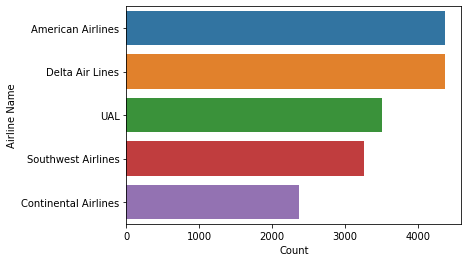

In [596]:
print(tsa['Airline Name'].value_counts().head())

airline = pd.DataFrame(tsa['Airline Name'].value_counts().head()).reset_index()
g = sns.barplot(y = 'index', x = 'Airline Name', data = airline)
g.set_xlabel('Count')
g.set_ylabel('Airline Name')

John F. Kennedy International
Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64


Los Angeles International Airport
Passenger Property Loss    1090
Property Damage             602
Personal Injury               8
Passenger Theft               6
Employee Loss (MPCECA)        5
Motor Vehicle                 3
Name: Claim Type, dtype: int64


Newark International Airport
Passenger Property Loss    1111
Property Damage             545
Personal Injury               9
Passenger Theft               4
Employee Loss (MPCECA)        4
Motor Vehicle                 2
Complaint                     1
Name: Claim Type, dtype: int64


Chicago O'Hare International Airport
Passenger Property Loss    934
Property Damage            693
Personal Injury             10
Employee Loss (MPCECA)       8
Passenger Theft              4
Motor Ve

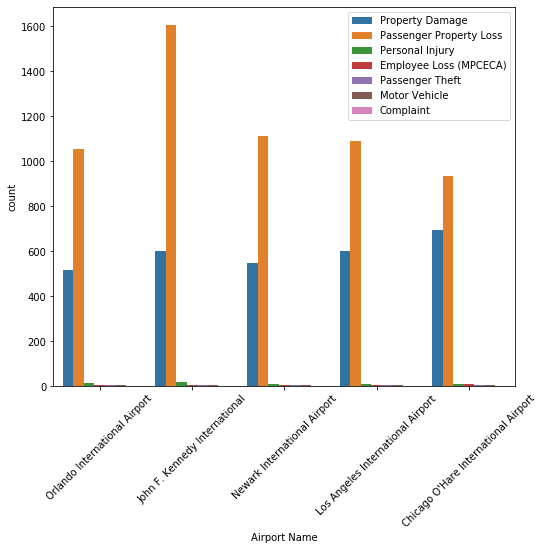

In [597]:
for i in tsa['Airport Name'].value_counts().head().index:
    print(i)
    print(tsa[tsa['Airport Name'] == i]['Claim Type'].value_counts())
    print('\n')

plt.figure(figsize = (8,6))

Airport = tsa[(tsa['Airport Name'] == 'John F. Kennedy International') | 
(tsa['Airport Name'] == 'Los Angeles International Airport') |
(tsa['Airport Name'] == 'Newark International Airport') |
(tsa['Airport Name'] == "Chicago O'Hare International Airport") |
(tsa['Airport Name'] == 'Orlando International Airport')]

sns.countplot(x = Airport['Airport Name'], hue = Airport['Claim Type'])
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

Dari analisa data di atas, dapat aku simpulkan bahwa kebanyakan airport memiliki masalah yang sama, yaitu adanya klaim <i>Passenger Property Loss</i> yang tinggi. Namun pada airport <i>John F. Kennedy International</i> tertinggi diantara airport lainnya.

In [598]:
for i in tsa['Airline Name'].value_counts().head().index:
    print(i)
    print(tsa[tsa['Airline Name'] == i]['Airport Name'].value_counts().head())
    print('\n')


American Airlines
Miami International Airport                514
Dallas-Fort Worth International Airport    447
Chicago O'Hare International Airport       306
Los Angeles International Airport          245
John F. Kennedy International              229
Name: Airport Name, dtype: int64


Delta Air Lines
Hartsfield-Jackson Atlanta International Airport    600
John F. Kennedy International                       255
Los Angeles International Airport                   167
LaGuardia                                           159
Cincinnati/Northern Kentucky International          141
Name: Airport Name, dtype: int64


UAL
Chicago O'Hare International Airport    486
Washington Dulles International         327
Los Angeles International Airport       258
Denver International Airport            193
Newark International Airport            106
Name: Airport Name, dtype: int64


Southwest Airlines
McCarran International                         187
Phoenix Sky Harbor International               178
B

American Airlines
Passenger Property Loss    2646
Property Damage            1507
Personal Injury              24
Passenger Theft              17
Employee Loss (MPCECA)       16
Name: Claim Type, dtype: int64


Delta Air Lines
Passenger Property Loss    2665
Property Damage            1504
Personal Injury              26
Passenger Theft               8
Employee Loss (MPCECA)        7
Name: Claim Type, dtype: int64


UAL
Passenger Property Loss    2072
Property Damage            1280
Personal Injury              19
Employee Loss (MPCECA)        7
Passenger Theft               5
Name: Claim Type, dtype: int64


Southwest Airlines
Passenger Property Loss    1955
Property Damage            1165
Personal Injury              28
Passenger Theft              13
Employee Loss (MPCECA)        7
Name: Claim Type, dtype: int64


Continental Airlines
Passenger Property Loss    1539
Property Damage             722
Personal Injury              12
Employee Loss (MPCECA)        7
Passenger Theft       

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

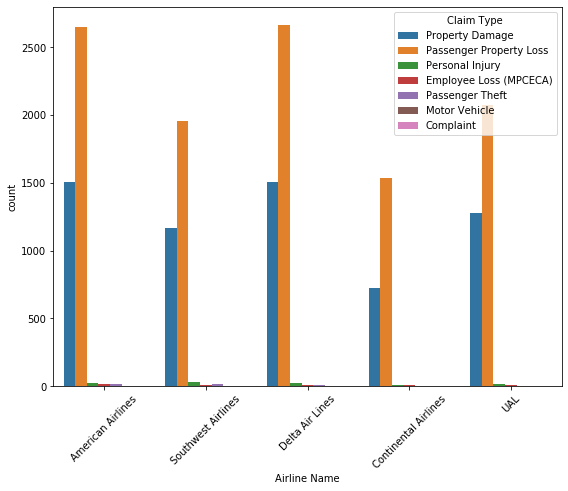

In [599]:
for i in tsa['Airline Name'].value_counts().head().index:
    print(i)
    print(tsa[tsa['Airline Name'] == i]['Claim Type'].value_counts().head())
    print('\n')
    
Airlines = tsa[(tsa['Airline Name'] == 'American Airlines') |
             (tsa['Airline Name'] == 'Delta Air Lines') | 
             (tsa['Airline Name'] == 'UAL') |
             (tsa['Airline Name'] == 'Southwest Airlines') |
             (tsa['Airline Name'] == 'Continental Airlines')]

    
plt.figure(figsize = (8,6))

sns.countplot(x = Airlines['Airline Name'], hue = Airlines['Claim Type'])
plt.tight_layout()
plt.xticks(rotation=45)

Berdasarkan analisa di atas, American Airlines dan Delta Air Lines juga memiliki angka yang tinggi untuk tipe klaim <i>Passenger Property Loss </i>. 

In [600]:
tsa[tsa['Airport Name'] == 'John F. Kennedy International']['Airline Name'].value_counts().head()

Jet Blue               550
Delta Air Lines        255
American Airlines      229
Delta Air Lines        179
American Airlines      105
Name: Airline Name, dtype: int64

In [601]:
tsa[tsa['Airport Name'] == 'Los Angeles International Airport']['Airline Name'].value_counts().head()

UAL                   258
American Airlines     245
Delta Air Lines       167
Southwest Airlines    133
Alaska Airlines       132
Name: Airline Name, dtype: int64

Menurut analisaku, seharusnya adanya hubungan antara nama airport dan nama airline dengan tipe klaim dan banyaknya klaim yang terjadi. Dikarenakan <i> John F. Kennedy International </i> dan <i> Los Angeles International Airport </i> boleh dikatakan sangat signifikan untuk data ini dan mereka memiliki masalah yang sama tingginya klaim <i> Passenger Property Loss </i>. Sedangkan untuk airline dengan tingginya klaim yang sama, ada <i> American Airlines </i> dan <i> Delta Air Lines </i>. Dan dari value_counts di atas, frekuensi <i> American Airlines </i> dan <i> Deltai Air Lines </i> berada di lima tertinggi untuk airport <i> John F. Kennedy International </i> dan <i> Los Angeles International Airport </i>. 

In [602]:
tsa[tsa['Claim Type'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.00,Deny,42.0,200.00
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.0,Approved,678.00,Approve in Full,35.0,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.0,Settled,171.99,Settle,44.0,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.0,Denied,0.00,Deny,39.0,150.00
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49785,2015011519916,2015-01-15,2014-11-24,JFK,John F. Kennedy International,American Airlines,NaN,Checked Baggage,Personal Accessories,NaN,NaN,NaN,NaN,52.0,NaN
50526,2015111826966,2015-11-18,2015-10-25,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,NaN,Checked Baggage,Personal Electronics,NaN,NaN,NaN,NaN,24.0,NaN
50915,2015092825664,2015-09-11,2015-06-02,SJU,Luis Munoz Marin International,NaN,NaN,NaN,Personal Accessories,NaN,NaN,NaN,NaN,101.0,NaN
50931,2015081924982,2015-08-17,2015-06-28,SLC,Salt Lake City International Airport,USAir,NaN,Checkpoint,Personal Accessories,NaN,NaN,NaN,NaN,50.0,NaN


In [603]:
sum(tsa['Claim Type'].isna())

2031

In [604]:
len(tsa['Claim Type'])

51066

In [605]:
round((sum(tsa['Claim Type'].isna())/len(tsa['Claim Type']))*100,2)

3.98

Menurut karena data missing value sangatlah kecil (Sekitar 4%), maka tebakanku adanya kelalaian manusia misalnya lupa menuliskan karena sudah panik. 

#### No. 2

In [606]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [607]:
tsa[['Status','Disposition']].head()

,Status,Disposition
0,Approved,Approve in Full
1,Canceled,NaN
2,Denied,Deny
3,Approved,Approve in Full
4,Canceled,NaN


In [608]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [609]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [610]:
for i in tsa['Status'].unique():
    print('Status : {}'.format(i))
    print(tsa[tsa['Status'] == i]['Disposition'].value_counts())
    print('\n')
    
    

Status : Approved
Approve in Full    8724
Name: Disposition, dtype: int64


Status : Canceled
Settle             2
Deny               2
Approve in Full    1
Name: Disposition, dtype: int64


Status : Denied
Deny    17125
Name: Disposition, dtype: int64


Status : Settled
Settle    6970
Name: Disposition, dtype: int64


Status : In litigation
Deny               15
Approve in Full     1
Name: Disposition, dtype: int64


Status : Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.
Deny               4
Approve in Full    1
Name: Disposition, dtype: int64


Status : Closed as a contractor claim
Series([], Name: Disposition, dtype: int64)


Status : In review
Deny    1
Name: Disposition, dtype: int64


Status : Claim entered
Series([], Name: Disposition, dtype: int64)


Status : Deny
Series([], Name: Disposition, dtype: int64)


Status : nan
Series([], Name: Disposition, dtype: int64)


Status : Settle
Series([], Name:

Text(0, 0.5, 'Disposition')

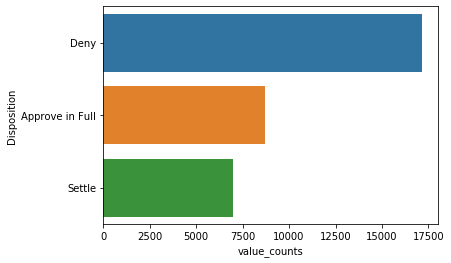

In [611]:
val = pd.DataFrame(tsa['Disposition'].value_counts()).reset_index()
g = sns.barplot(val['Disposition'], val['index'])
g.set_xlabel('value_counts')
g.set_ylabel('Disposition')

Text(0, 0.5, 'Status')

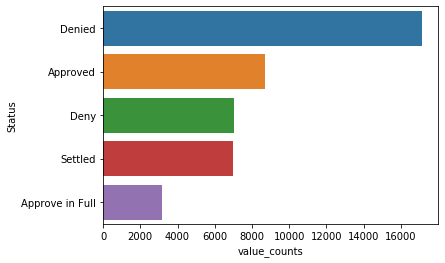

In [612]:
val = pd.DataFrame(tsa['Status'].value_counts().head(5)).reset_index()
g = sns.barplot(val['Status'], val['index'])
g.set_xlabel('value_counts')
g.set_ylabel('Status')

Dapat dilihat bahwa dari angka-angkanya terdapat tiga kelas yaitu Approved, Denied, dan Settled. 

In [613]:
import scipy.stats as ss


def correlation_ratio(categories, measurement):
    fcat,_ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurement,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [614]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [615]:
for i in ['Status','Item','Claim Type', 'Claim Site', 'Disposition']:
    print("Cramer's V Correlation : Disposition and {}".format(i))
    print(cramers_v(tsa['Disposition'],tsa[i]))
    print("Cramer's V Correlation : Status and {}".format(i))
    print(cramers_v(tsa['Status'],tsa[i]))
    print('\n')

Cramer's V Correlation : Disposition and Status
0.9997805219577847
Cramer's V Correlation : Status and Status
1.0


Cramer's V Correlation : Disposition and Item
0.20752389076649505
Cramer's V Correlation : Status and Item
0.30130603622286906


Cramer's V Correlation : Disposition and Claim Type
0.09528093132486984
Cramer's V Correlation : Status and Claim Type
0.09986183502672415


Cramer's V Correlation : Disposition and Claim Site
0.08182961854661384
Cramer's V Correlation : Status and Claim Site
0.12656820532429552


Cramer's V Correlation : Disposition and Disposition
1.0
Cramer's V Correlation : Status and Disposition
0.9997805219577847




Kolom <i>Item</i> memiliki korelasi yang cukup kuat pada analisa Cramer dengan Disposisi dan Status, mungkin barang-barang yang diklaim juga menjadi salah satu pertimbangan pada penetapan status.

In [616]:
correlation_ratio(tsa['Disposition'], tsa['Close Amount'])

nan

In [617]:
for i in ['Claim Amount','Amount Differences','Close Amount']:
    print("Spearman's Correlation")
    print(tsa[['Disposition',i]].apply(lambda x : pd.factorize(x)[0]).corr('spearman'))
    print('\n')

Spearman's Correlation
              Disposition  Claim Amount
Disposition      1.000000      0.141241
Claim Amount     0.141241      1.000000


Spearman's Correlation
                    Disposition  Amount Differences
Disposition            1.000000            0.830399
Amount Differences     0.830399            1.000000


Spearman's Correlation
              Disposition  Close Amount
Disposition      1.000000      0.676717
Close Amount     0.676717      1.000000




In [618]:
for i in ['Claim Amount','Amount Differences','Close Amount']:
    print("Spearman's Correlation")
    print(tsa[['Status',i]].apply(lambda x : pd.factorize(x)[0]).corr('spearman'))
    print('\n')

Spearman's Correlation
                Status  Claim Amount
Status        1.000000      0.216488
Claim Amount  0.216488      1.000000


Spearman's Correlation
                      Status  Amount Differences
Status              1.000000           -0.207765
Amount Differences -0.207765            1.000000


Spearman's Correlation
                Status  Close Amount
Status        1.000000     -0.439555
Close Amount -0.439555      1.000000




In [619]:
for i in ['Claim Amount','Amount Differences','Close Amount']:
    print("Pearson's Correlation")
    print(tsa[['Disposition',i]].apply(lambda x : pd.factorize(x)[0]).corr('pearson'))
    print('\n')

Pearson's Correlation
              Disposition  Claim Amount
Disposition      1.000000      0.098849
Claim Amount     0.098849      1.000000


Pearson's Correlation
                    Disposition  Amount Differences
Disposition            1.000000            0.423439
Amount Differences     0.423439            1.000000


Pearson's Correlation
              Disposition  Close Amount
Disposition      1.000000      0.228873
Close Amount     0.228873      1.000000




In [620]:
for i in ['Claim Amount','Amount Differences','Close Amount']:
    print("Pearson's Correlation")
    print(tsa[['Status',i]].apply(lambda x : pd.factorize(x)[0]).corr('pearson'))
    print('\n')

Pearson's Correlation
                Status  Claim Amount
Status        1.000000      0.071594
Claim Amount  0.071594      1.000000


Pearson's Correlation
                      Status  Amount Differences
Status              1.000000           -0.166247
Amount Differences -0.166247            1.000000


Pearson's Correlation
                Status  Close Amount
Status        1.000000     -0.209302
Close Amount -0.209302      1.000000




## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [621]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [622]:
tsaD = tsa[(tsa['Claim Type'] == 'Property Damage') | (tsa['Claim Type'] == 'Passenger Property Loss')]

Text(0, 0.5, 'item')

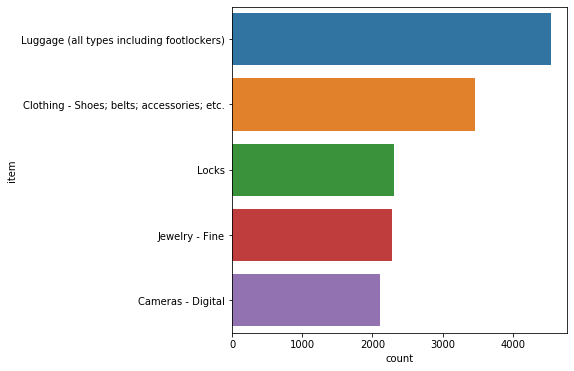

In [623]:
plt.figure(figsize = (6,6))
p = pd.DataFrame(tsaD['Item'].value_counts()).reset_index().head(6)
p.drop(index = 0, inplace = True)
sns.barplot(y = p['index'], x = p['Item'])
plt.xlabel('count')
plt.ylabel('item')

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [624]:
np.random.seed(101)

In [625]:
tsad = tsa[(tsa['Amount Differences'] >= Q1_amount - (1.5*IQR)) & (tsa['Amount Differences'] <= Q3_amount + (1.5 * IQR))]
tsad.dropna(inplace = True)
tsad = tsad.sample(1000, random_state=np.random.seed(101))
tsad.to_csv('tsa_claims_dashboard_ujian.csv',index = False)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [626]:
tsad

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
13486,2005013174898,2005-01-12,2004-12-20,BUF,Buffalo Niagara International,Continental Airlines,Property Damage,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,81.19,Approved,81.19,Approve in Full,23.0,0.0
12542,2004122770950,2004-11-22,2004-11-07,SEA,Seattle-Tacoma International,Jet Blue,Passenger Property Loss,Checkpoint,Other,350.00,Denied,0.00,Deny,15.0,350.0
28747,2007121136344,2007-12-10,2007-12-07,CRW,Yeager; Charleston,Delta Air Lines,Passenger Property Loss,Checked Baggage,Locks,10.00,Denied,0.00,Deny,3.0,10.0
16720,2005070688338,2005-07-05,2005-06-03,OKC,Will Rogers World,UAL,Passenger Property Loss,Checked Baggage,Locks,20.00,Approved,20.00,Approve in Full,32.0,0.0
26260,2007060426211,2007-05-29,2007-05-20,DFW,Dallas-Fort Worth International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Tools - Manual (not in a vehicle),44.88,Approved,44.88,Approve in Full,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,2004051050775,2004-03-11,2004-01-24,MOB,Mobile Regional,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),290.00,Settled,275.50,Settle,47.0,14.5
15081,2005040781877,2005-04-05,2005-03-08,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,64.94,Approved,64.94,Approve in Full,28.0,0.0
25137,2007022821705,2007-02-27,2007-02-17,OGG,Kahului-Maui; HI,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,45.00,Approved,45.00,Approve in Full,10.0,0.0
256,0616792L,2003-01-02,2002-11-28,STL,Lambert St. Louis International,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,35.0,0.0


Export the data to your SQL database, and try to connect the database to the dashboard